<a href="https://colab.research.google.com/github/Balajilp/Time_Series_EDA_Forecastings/blob/main/ARIMA_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrating Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_airline = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.dropna(axis=0, inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.set_index('Month',inplace=True)

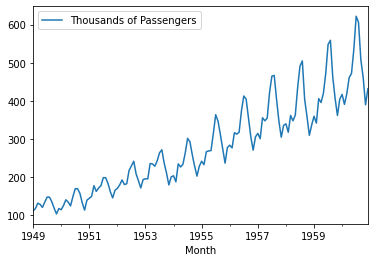

In [11]:
df_airline.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('P-Value {}'.format(result[1]))
  if result[1]<=0.5:
    print('reject the null hypothesis, Data has no unit root and is stationary')
  else:
    print('Accept the nulll hypothesis, Data has a unit root, and is non-stationary')


In [14]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060472
P-Value 0.991880243437641
Accept the nulll hypothesis, Data has a unit root, and is non-stationary


In [15]:
# in order to make it stationary ,  we are finding the differences
df_airline['Difference first shift']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [16]:
df_airline.head()

,Thousands of Passengers,Difference first shift
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [17]:
adf_test(df_airline['Difference first shift'].dropna()) # before checking we need to drop the null values also, otherwise it will through an error.
# if we don't get stationary data in this methoed.  we need to move to shift2, 3 likewise

ADF Statistics: -2.8292668241700056
P-Value 0.054213290283824704
reject the null hypothesis, Data has no unit root and is stationary


In [18]:
# since it is the seasonal data so we use shift 12 considering 12 months
df_airline['Difference 12 shift']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Difference 12 shift'].dropna())

ADF Statistics: -3.383020726492481
P-Value 0.011551493085514952
reject the null hypothesis, Data has no unit root and is stationary


In [19]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

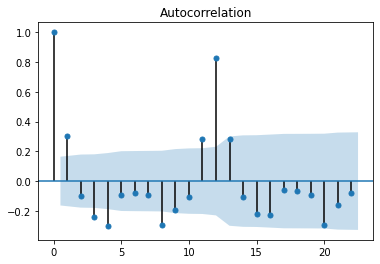

In [22]:
acf = plot_acf(df_airline['Difference first shift'].dropna())

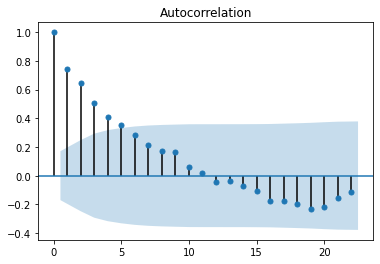

In [21]:
acf12 = plot_acf(df_airline['Difference 12 shift'].dropna())

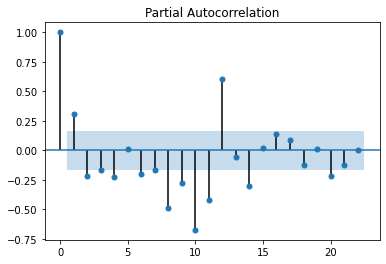

In [23]:
pacf = plot_pacf(df_airline['Difference first shift'].dropna())

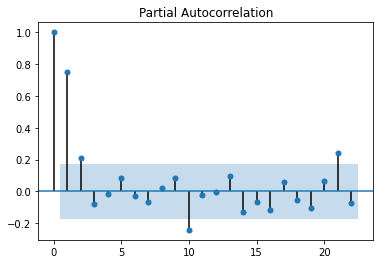

In [24]:
pacf12 = plot_pacf(df_airline['Difference 12 shift'].dropna())

In [25]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [26]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [27]:
test_data

,Thousands of Passengers,Difference first shift,Difference 12 shift
Month,,,
1956-01-01,284.0,6.0,42.0
1956-02-01,277.0,-7.0,44.0
1956-03-01,317.0,40.0,50.0
1956-04-01,313.0,-4.0,44.0
1956-05-01,318.0,5.0,48.0
1956-06-01,374.0,56.0,59.0
1956-07-01,413.0,39.0,49.0
1956-08-01,405.0,-8.0,58.0
1956-09-01,355.0,-50.0,43.0


In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
model_arima = ARIMA(train_data['Thousands of Passengers'],order=(4, 2, 3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [65]:
train_data

,Thousands of Passengers,Difference first shift,Difference 12 shift
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,NaN
1949-04-01,129.0,-3.0,NaN
1949-05-01,121.0,-8.0,NaN
...,...,...,...
1955-08-01,347.0,-17.0,54.0
1955-09-01,312.0,-35.0,53.0
1955-10-01,274.0,-38.0,45.0


In [66]:
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


LinAlgError: ignored

In [67]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Mon, 28 Feb 2022   AIC                            775.563
Time:                                07:55:56   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [68]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [69]:
pred = model_arima_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [70]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

In [71]:
test_data['pred_arima'] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


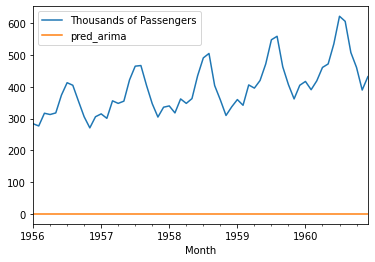

In [72]:
test_data[['Thousands of Passengers', 'pred_arima']].plot()

## Try with SARIMAX model

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model_sarimax = SARIMAX(train_data['Thousands of Passengers'], order=(3, 0, 5), seasonal_order=(0, 1, 0, 12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [60]:
model_sarimax_fit = model_sarimax.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [61]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -265.240
Date:                            Mon, 28 Feb 2022   AIC                            548.481
Time:                                    07:55:07   BIC                            568.971
Sample:                                01-01-1949   HQIC                           556.638
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5977      0.938      0.638      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.583      0.000       0.376       1.286
ar.L3         -0.4519      0.894     -0.506      0.613      -2.203       1.300
ma.L1          0.1844      1.164      0.158      0.874      -2.098       2.466
ma.L2         -0.5336      1.262     -0.423      0.672      -3.007       1.940
ma.L3         -0.0987      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1274      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2470      0.357      0.692      0.489      -0.452       0.946
sigma2        87.7355     81.196      1.081      0.280     -71.406     246.877
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [77]:
pred_Sarima=model_sarimax_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred_Sarima

In [78]:
residuals

Month
1956-01-01     -2.182858
1956-02-01     -4.276759
1956-03-01      7.085046
1956-04-01      2.324540
1956-05-01      6.664780
1956-06-01     19.050313
1956-07-01      9.601134
1956-08-01     19.928101
1956-09-01      5.552930
1956-10-01     -4.219698
1956-11-01     -1.566427
1956-12-01     -6.438270
1957-01-01     -4.958517
1957-02-01    -13.013985
1957-03-01     14.009394
1957-04-01      6.207917
1957-05-01     13.201953
1957-06-01     37.476339
1957-07-01     32.668431
1957-08-01     53.821960
1957-09-01     27.072127
1957-10-01     10.070430
1957-11-01      6.330692
1957-12-01     -1.820219
1958-01-01     -4.753468
1958-02-01    -20.133217
1958-03-01     -3.543885
1958-04-01    -16.710767
1958-05-01     -1.172417
1958-06-01     28.698968
1958-07-01     37.413498
1958-08-01     71.129482
1958-09-01      6.880251
1958-10-01      2.409133
1958-11-01     -7.851594
1958-12-01    -19.501455
1959-01-01     -2.976883
1959-02-01    -13.883031
1959-03-01     23.143448
1959-04-01     14.4

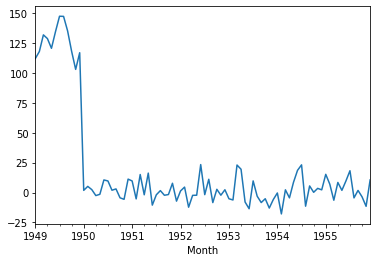

In [79]:
model_sarimax_fit.resid.plot()

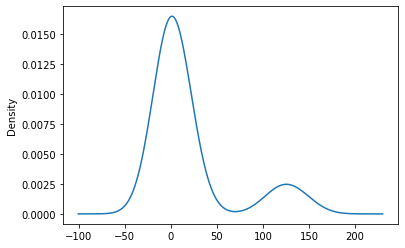

In [81]:
model_sarimax_fit.resid.plot(kind='kde')

In [82]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


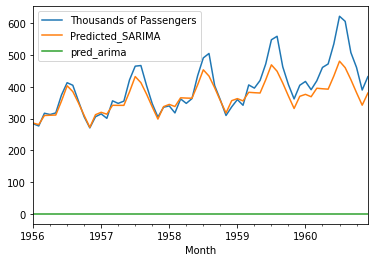

In [85]:
test_data[['Thousands of Passengers','Predicted_SARIMA','pred_arima']].plot()